##### ************** PROBLEMA NO. 1 **************************************************************

In [2]:
pip install pillow

In [6]:
from PIL import Image
import numpy as np
def color_filtro(imagen, color):
    img_array = np.array(imagen)
    resultado_array = np.zeros_like(img_array)

    if color == 1:
        resultado_array[..., 2] = img_array[..., 2]
    elif color == 2:
        resultado_array[..., 1] = img_array[..., 1]
    elif color == 3:
        resultado_array[..., 0] = img_array[..., 0]
    elif color == 10:
        resultado_array[..., 0] = img_array[..., 0]
        resultado_array[..., 1] = img_array[..., 1]
    elif color == 20:
        resultado_array[..., 1] = img_array[..., 1]
        resultado_array[..., 2] = img_array[..., 2]
    elif color == 30:
        resultado_array[..., 0] = img_array[..., 0]
        resultado_array[..., 2] = img_array[..., 2]
    else:
        raise ValueError("Valor de color no soportado.")
    resultado_imagen = Image.fromarray(resultado_array)
    return resultado_imagen

# Resultado

if __name__ == "__main__":
    imagen_inciso_1 = Image.open("IMAGEN.jpg")
    color = 3 # ACA SE DEBE DE COLOCAR LA OPCIÓN (1, 2, 3, 10, 20 o 30)
    imagen_filtrada = color_filtro(imagen_inciso_1, color)
    print(imagen_inciso_1)  
    imagen_filtrada.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1034x980 at 0x21053632AD0>


##### ************** PROBLEMA NO. 2 **************************************************************

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def aplicar_mapa_colores(imagen_escala_grises):
    img_array = np.array(imagen_escala_grises)
    colormap = cm.get_cmap('viridis')
    img_color = colormap(img_array / 255.0)
    img_color = (img_color[..., :3] * 255).astype(np.uint8)
    imagen_color = Image.fromarray(img_color)
    return imagen_color

# Resultado

if __name__ == "__main__":
    imagen_escala_grises = Image.open("imagen2_salida_gray_azul.jpg").convert('L')
    imagen_color = aplicar_mapa_colores(imagen_escala_grises)
    imagen_color.show()

    # Exportar imagen con color
    imagen_color.save("imagen_con_color.jpg")

C:\Users\Johnatan Ramirez\AppData\Local\Temp\ipykernel_6388\1832723617.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


##### ************** PROBLEMA NO. 3 **************************************************************

In [11]:
def crear_imagenes_grises_por_canal(img):
    img_array = np.array(img)
    canales = ['rojo', 'verde', 'azul']
    imagenes_grises = {}
    for i, canal in enumerate(canales):
        gris_array = np.zeros_like(img_array)
        gris_array[..., i] = img_array[..., i]
        imagen_gris = Image.fromarray(gris_array)
        imagen_gris = imagen_gris.convert('L')
        imagenes_grises[canal] = imagen_gris
    return imagenes_grises

# Resultado

if __name__ == "__main__":
    img = Image.open("IMAGEN.jpg")
    imagenes_grises = crear_imagenes_grises_por_canal(img)
    for canal, imagen_gris in imagenes_grises.items():
        imagen_gris.show(title=f"Grises - Canal {canal}")
        imagen_gris.save(f"imagen_gris_{canal}.jpg")

##### ************** PROBLEMA NO. 4 **************************************************************

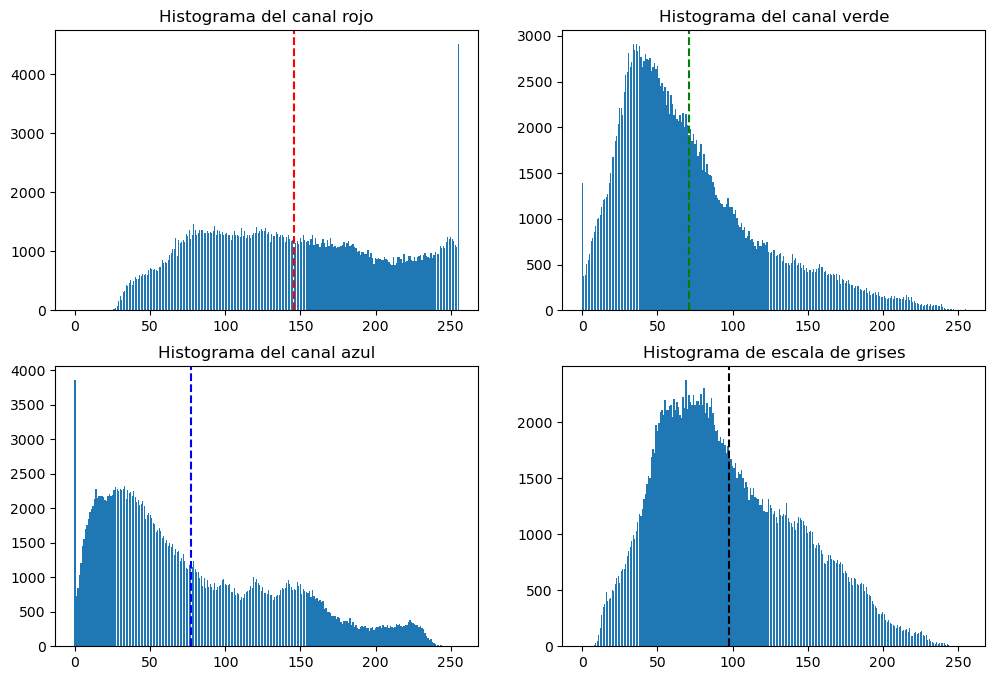

In [14]:
from PIL import Image
imgn = Image.open("IMAGEN_N.jpg")
def calcular_histogramas(imgn):
    if not isinstance(imgn, np.ndarray):
        imgn = np.array(imgn)
    filas, columnas, canales = imgn.shape
    grises = np.mean(imgn, axis=2).astype(np.uint8)
    h_rojo = [0] * 256
    h_verde = [0] * 256
    h_azul = [0] * 256
    h_gris = [0] * 256
    for i in range(filas):
        for j in range(columnas):
            h_rojo[imgn[i, j, 0]] += 1
            h_verde[imgn[i, j, 1]] += 1
            h_azul[imgn[i, j, 2]] += 1
            h_gris[grises[i, j]] += 1
 	
    med_rojo = np.mean(imgn[:, :, 0])
    med_verde = np.mean(imgn[:, :, 1])
    med_azul = np.mean(imgn[:, :, 2])
    med_gris = np.mean(grises)
 	
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
 	
    axs[0, 0].bar(range(256), h_rojo)
    axs[0, 0].axvline(x=med_rojo, color='r', linestyle='--')
    axs[0, 0].set_title('Histograma del canal rojo')
    axs[0, 1].bar(range(256), h_verde)
    axs[0, 1].axvline(x=med_verde, color='g', linestyle='--')
    axs[0, 1].set_title('Histograma del canal verde')
    axs[1, 0].bar(range(256), h_azul)
    axs[1, 0].axvline(x=med_azul, color='b', linestyle='--')
    axs[1, 0].set_title('Histograma del canal azul')
    axs[1, 1].bar(range(256), h_gris)
    axs[1, 1].axvline(x=med_gris, color='k', linestyle='--')
    axs[1, 1].set_title('Histograma de escala de grises')
    plt.show()
calcular_histogramas(imgn)


##### ************** PROBLEMA NO. 5 **************************************************************

#### Escala de grises ponderado

###### Se emplea para convertir imágenes en color a escala de grises de manera que refleje la percepción humana del brillo. Este método mejora la precisión visual al asignar diferentes ponderaciones a los componentes de color según cómo el ojo humano percibe estos colores.

#### Enfoque de Escala de Grises Ponderado en Python
###### En el procesamiento de imágenes, especialmente con bibliotecas como Pillow o OpenCV, la conversión a escala de grises ponderada se realiza utilizando fórmulas matemáticas que asignan diferentes factores de peso a los canales de color rojo, verde y azul. 

In [2]:
def escala_grises_ponderada(imgn, pesos=[0.299, 0.587, 0.114]):
  if imgn.dtype != np.float32:
    imgn = imgn.astype(np.float32) / 255.0
  grises = np.dot(imgn, pesos)
  grises *= 255
  grises = np.clip(grises, 0, 255)
  grises = grises.astype(np.uint8)
  return grises

##### ************** PROBLEMA NO. 6 **************************************************************

#### Espacio de Color HSV
###### El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que se utiliza ampliamente en procesamiento de imágenes, gráficos por computadora y edición fotográfica. Este modelo de color es particularmente útil debido a su representación intuitiva de los colores y cómo se relacionan con la percepción humana.

#### Componentes del Espacio HSV
###### Hue (Tono): Representa el color puro en sí mismo y se mide en grados en un círculo de 360°. Los valores de tono suelen estar en el rango de 0 a 360 grados, donde:

###### - 0° es rojo,
###### - 60° es amarillo,
###### - 120° es verde,
###### - 180° es cian,
###### - 240° es azul,
###### - 300° es magenta.
###### - Saturation (Saturación): Indica la intensidad o pureza del color. Una saturación del 100% significa un color puro sin mezcla con gris, mientras que una saturación del 0% resulta en un color gris neutro. La saturación se mide en porcentaje, del 0% al 100%.

###### Value (Valor o Brillo): Representa el brillo del color. Un valor de 0% corresponde al negro (sin brillo), y 100% corresponde al color más brillante posible en ese tono. El valor también se mide en porcentaje.

#### Uso y Ventajas del Espacio HSV
###### El espacio HSV es especialmente útil en aplicaciones que requieren manipulación de color basada en la percepción humana. Por ejemplo:

###### Selección de Color: Permite a los usuarios seleccionar colores de manera intuitiva ajustando el tono, la saturación y el brillo.
###### Edición de Imagen: Facilita la modificación de atributos específicos del color, como ajustar el brillo sin alterar el tono.
###### Segmentación de Imagen: Permite segmentar imágenes basadas en el rango de tonos o niveles de saturación y brillo.
###### Mapeo de Colores al Espacio HSV en Python
###### En Python, el mapeo de colores al espacio HSV se puede realizar utilizando bibliotecas como OpenCV y matplotlib, que proporcionan funciones para la conversión entre espacios de colo